В этом уроке мы изучим датасет UCI Student Performance dataset. Сначала его нужно скачать по этой [ссылке](https://archive.ics.uci.edu/dataset/320/student+performance). У вас должен появиться архив student+performance с расширением zip. Откройте его и найдете файл student-mat.csv, это файл, в котором записана таблица, в нем данные о 395 студентах. Каждый студент - это строка в таблице, а каждый столбец это категория с информацией, например, есть столбец в котором написано в какой школе студент учится, а есть стобец в котором написан его возраст.



Импортируйте библиотеку pandas, если у вас ее нет, то скачайте с помощью команды pip install pandas, для удобства мы сократим pandas как pd.

In [2]:
import pandas as pd

Здесь мы читаем файл и созраняем его в переменной df. Замените путь к файлу "/content/drive/MyDrive/Colab Notebooks/тестзадание0/student-mat.csv" на свой. Обычно в csv файле данные разделены с помощью запятой, если у вас они разделены по-другому, например, с помощью точки с запятой, допишите sep=";".

In [7]:
df = pd.read_csv("../data/student-mat.csv", sep=";")

В файле множество стобцов, но мы делаем на уроке простую модель, поэтому сохраним только столбцы:

*   studytime время, которое студент тратит на учёбу в неделю
*   failures количество прошлых неудачных попыток
*   absences количество пропущенных занятий
*   G1 оценка за первый учебный период
*   G2 оценка за второй учебный период
*   G3 итоговая оценка за курс

Для этого сохраняем df вот так

In [8]:
df = df[['studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]

Сделаем первичную проверку и исследование датасета с помощью pandas. Это важно, чтобы понять, с чем мы работаем. Запустите

In [9]:
print('просмотр первых пяти строк:')
print(df.head())

print('\nинформация о типах данных и пропущенных значениях:')
print(df.info())

print('\nпроверка на пропуски:')
print(df.isnull().sum())

print('\nнемного описательной статистики:')
print(df.describe())

print('\nразмер таблицы (строки, столбцы):')
print(df.shape)

print('\nсписок всех колонок:')
print(df.columns)

print('\nтипы данных по колонкам:')
print(df.dtypes)

print('\nколичество уникальных значений в каждой колонке:')
print(df.nunique())

print('\nколичество дублирующихся строк:')
print(df.duplicated().sum())


просмотр первых пяти строк:
   studytime  failures  absences  G1  G2  G3
0          2         0         6   5   6   6
1          2         0         4   5   5   6
2          2         3        10   7   8  10
3          3         0         2  15  14  15
4          2         0         4   6  10  10

информация о типах данных и пропущенных значениях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  395 non-null    int64
 1   failures   395 non-null    int64
 2   absences   395 non-null    int64
 3   G1         395 non-null    int64
 4   G2         395 non-null    int64
 5   G3         395 non-null    int64
dtypes: int64(6)
memory usage: 18.6 KB
None

проверка на пропуски:
studytime    0
failures     0
absences     0
G1           0
G2           0
G3           0
dtype: int64

немного описательной статистики:
        studytime    failures    absen

Признаки (features) — это характеристики объекта, по которым мы хотим сделать прогноз. В нашем случае это данные о студенте: сколько он учится, сколько у него было неудач, сколько занятий он пропустил и его предыдущие оценки. Мы даём эти данные модели, чтобы она могла понять, как они влияют на результат.

Целевая переменная (target variable) — это то, что мы хотим предсказать. У нас это: сдаст студент экзамен или нет. Модель будет учиться на данных, чтобы научиться предсказывать это значение.

Мы выбрали следующие признаки: studytime, failures, absences, G1 и G2. Эти признаки — простые, понятные и реально могут влиять на результат экзамена. Целевой переменной у нас стал новый столбец pass_exam, который мы создали на основе финальной оценки в столбце G3. Если значение в столбце G3 больше или равно 10, значит студент сдал экзамен, иначе — не сдал. После этого столбец G3 мы удалили из датафрейма, так как он больше не нужен.

In [10]:
df['pass_exam'] = (df['G3'] >= 10).astype(int)
df = df.drop(columns=['G3'])

EDA (Exploratory Data Analysis) — это первичный анализ данных, когда мы изучаем и визуализируем набор данных, чтобы понять его структуру, распределение и взаимосвязи между признаками. Это важный шаг перед построением моделей.

Гистограмма (Histogram) — это график, который показывает, как часто встречаются разные значения признака. Например, по оси X — значения признака (например, количество часов учебы в неделю), а по оси Y — количество студентов с такими значениями.

Зачем строить гистограммы?

Чтобы увидеть распределение данных: равномерное, скошенное, с выбросами или с пропусками.Например, гистограмма для studytime покажет, сколько студентов учатся 1 час, 2 часа и так далее.


Корреляция (Correlation) показывает, насколько два признака связаны друг с другом.

Значение корреляции — от -1 до +1:

+1 — признаки сильно положительно связаны (когда один растет, другой тоже).

-1 — признаки сильно отрицательно связаны (когда один растет, другой падает).

0 — связи нет.

Зачем смотреть корреляции?

Чтобы понять, какие признаки влияют друг на друга. Например, оценки за разные периоды (G1 и G2) часто сильно коррелируют. Это помогает выбрать важные признаки для модели и понять данные лучше.

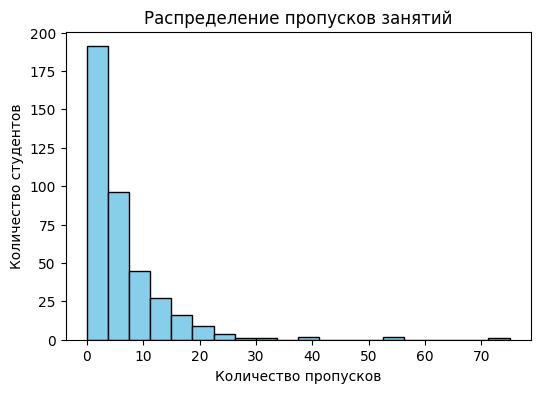

In [11]:
import matplotlib.pyplot as plt  # импортировали нужную библиотеку для визуализации

plt.figure(figsize=(6, 4))  # установили размер графика
df['absences'].hist(bins=20, color='skyblue', edgecolor='black')  # построили гистограмму по колонке 'absences'
plt.title("Распределение пропусков занятий")  # добавили заголовок графика
plt.xlabel("Количество пропусков")  # подпись по оси X
plt.ylabel("Количество студентов")  # подпись по оси Y
plt.grid(False)  # убрали серую сетку с фона
plt.show()  # показали график


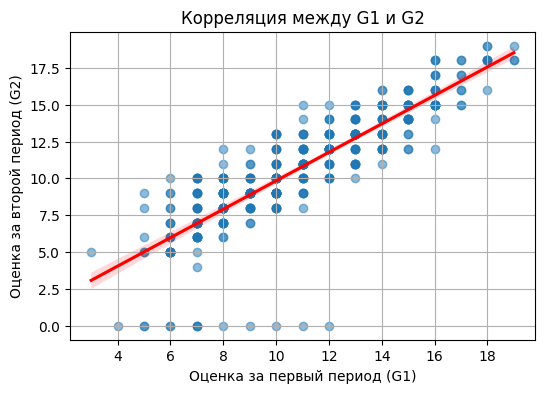

Коэффициент корреляции между G1 и G2: 0.85


In [15]:
import seaborn as sns  # импортировали библиотеку seaborn для визуализации и статистики

# Точечная диаграмма + линия регрессии
plt.figure(figsize=(6, 4))  # установили размер графика
sns.regplot(
    x='G1', y='G2', data=df,  # указали оси и данные
    scatter_kws={'alpha':0.5},  # сделали точки полупрозрачными
    line_kws={'color':'red'}  # задали цвет линии регрессии
)
plt.title("Корреляция между G1 и G2")  # добавили заголовок
plt.xlabel("Оценка за первый период (G1)")  # подпись по оси X
plt.ylabel("Оценка за второй период (G2)")  # подпись по оси Y
plt.grid(True)  # включили серую сетку на фоне
plt.show()  # показали график

# Показать коэффициент корреляции
correlation = df['G1'].corr(df['G2'])  # рассчитали коэффициент корреляции Пирсона между G1 и G2
print(f"Коэффициент корреляции между G1 и G2: {correlation:.2f}")  # вывели результат


На этом наш урок закончен. Внимательно изучайте урок, ищите информацию самостоятельно и не бойтесь задачать вопросы. Встретимся на втором уроке.